# Lecture 10

* K-means
* Mixture of Gaussians

Import necessary libraries:

In [55]:
import numpy as np
import pandas as pd
import random
import math
import sklearn.datasets as ds
from ml_metrics import rmse

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

# K-means algorithm

K-means algorithm is implemented in the scikit-learn package:

In [56]:
from sklearn.cluster import KMeans

To illustrate how you can train this algorithm we generate some toy data and fit the algorithm on these data.

In [57]:
from sklearn.datasets.samples_generator import make_blobs
np.random.seed(0)
centers = [[1, 1], [-1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.5)

Helper function for data visualization:

In [58]:
def plot_cluster_data(X, c=[1]*X.shape[0], mu=None):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    if len(np.unique(c)) == 1:
        ax.plot(X[:,0], X[:,1], 'o')
    else:
        ix = np.where(c==1)
        ax.plot(X[ix,0], X[ix,1], 'o', markerfacecolor='red')
        ax.plot(mu[0,0], mu[0,1], 'o', markerfacecolor='red', markersize=12)
        ix = np.where(c==0)
        ax.plot(X[ix,0], X[ix,1], 'o', markerfacecolor='green')
        ax.plot(mu[1,0], mu[1,1], 'o', markerfacecolor='green', markersize=12)
    if not mu is None:
        ax.plot(mu[0,0], mu[0,1], 'o', markerfacecolor='red', markersize=12)
        ax.plot(mu[1,0], mu[1,1], 'o', markerfacecolor='green', markersize=12)        
    plt.show()

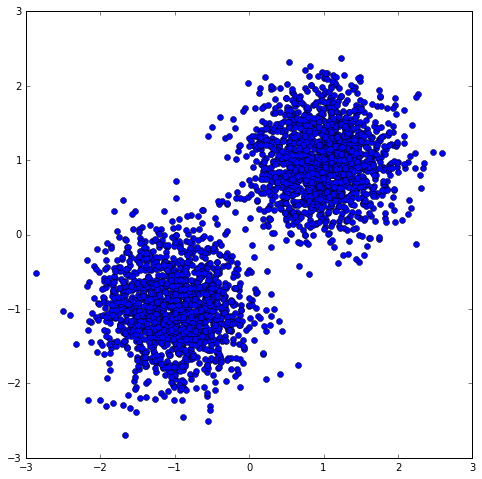

In [59]:
plot_cluster_data(X)

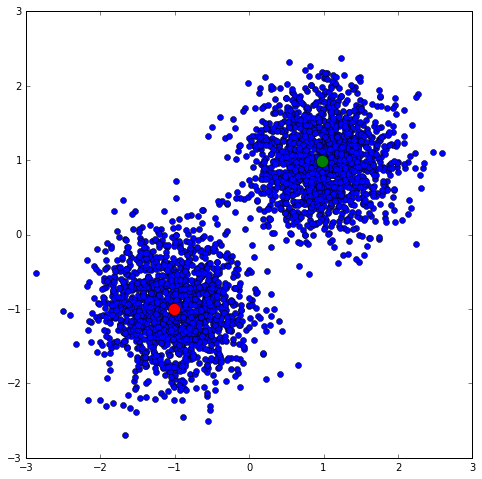

In [47]:
clst = KMeans(n_clusters=2, random_state=2342)
clst.fit(X)
mu = clst.cluster_centers_
plot_cluster_data(X, mu = mu)

Now we show what happens on each step of the algorithm. We will use two additional functions that corresponds to the two steps of k-means algorithm (check the Lecture 10).

In [36]:
def update_labels(X, mu):
    c = np.argmax(np.c_[np.sum(np.power(X - mu[0,:], 2), axis=1), np.sum(np.power(X - mu[1,:], 2), axis=1)], axis=1)
    return c

def update_cluster_centers(X, c):
    ix = np.where(c==1)
    mu[0,:] = np.mean(X[ix,:], axis=1)
    ix = np.where(c==0)
    mu[1,:] = np.mean(X[ix,:], axis=1)
    return mu

First step of algorithm will be to choose the number of clusters k and cluster centers randomly.

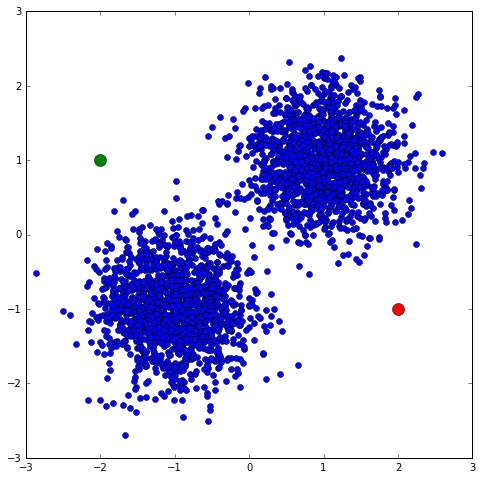

In [48]:
k = 2
mu = np.array([[2.0,-1.0], [-2.0,1.0]])
plot_cluster_data(X, mu=mu)

Now for each point we calculate what is the closest center:

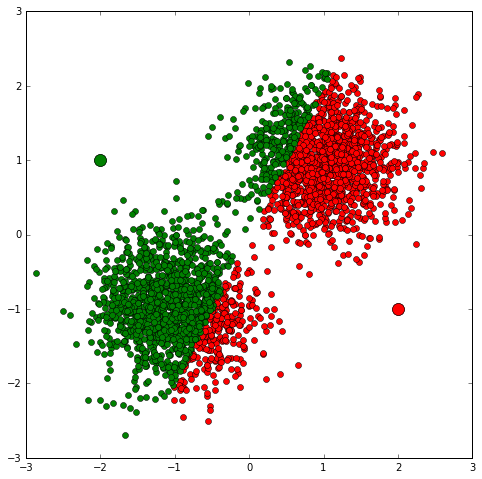

In [49]:
c = update_labels(X, mu)
plot_cluster_data(X, c=c, mu=mu)

Now we update $\mu$.

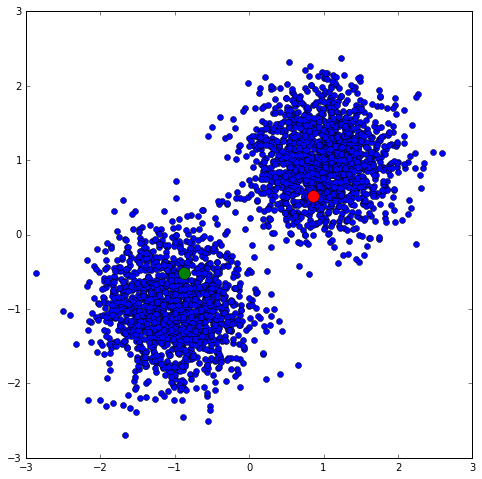

In [50]:
mu = update_cluster_centers(X, c)
plot_cluster_data(X, mu=mu)

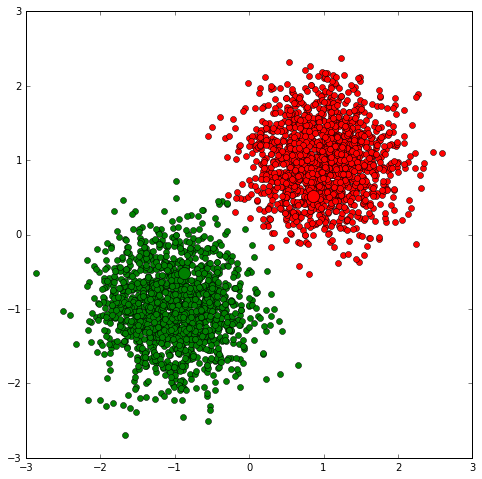

In [51]:
c = update_labels(X, mu)
plot_cluster_data(X, c=c, mu=mu)

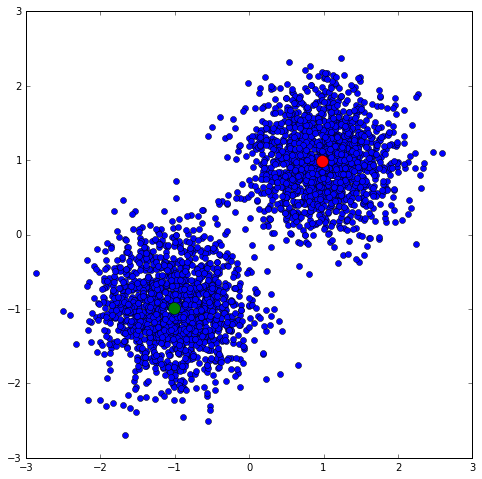

In [52]:
mu = update_cluster_centers(X, c)
plot_cluster_data(X, mu=mu)

# Mixture of Gaussians

In [60]:
from sklearn.mixture import GMM

In [61]:
np.random.seed(0)
n_samples = 1000
X1 = 2.0*np.random.randn(n_samples, 2) + np.array([5, 3])
C = np.array([[0., -0.5], [3.5, .7]])
X2 = np.dot(np.random.randn(n_samples, 2), C)
X_train = np.vstack([X1, X2])

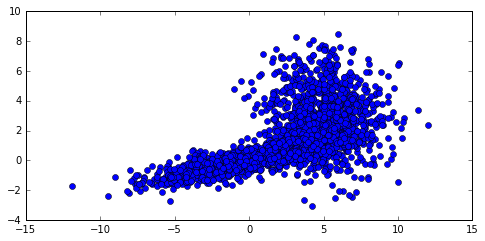

In [62]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train[:,0], X_train[:,1], 'o')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

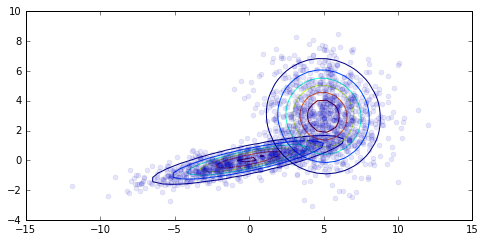

In [63]:
np.random.seed(1)
model = GMM(n_components=2, covariance_type='full')
model.fit(X_train)
#print model.converged_
#print model.means_
#print model.covars_

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train[:,0], X_train[:,1], 'o', alpha=.1, ms=5)

for i in range(2):    
    mu = model.means_[i]
    sigma = model.covars_[i]
    sigma_inv = np.linalg.inv(sigma)
    x = np.linspace(-15.0, 15.0)
    y = np.linspace(-4.0, 10.0)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    P = np.exp(-0.5*np.diagonal(np.dot(np.dot(XX - mu, sigma_inv), np.transpose(XX - mu))))/(2*np.pi*np.linalg.det(sigma)**0.5)
    P = P.reshape(X.shape)
    CS = plt.contour(X, Y, P)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()